<a href="https://colab.research.google.com/github/JuyoungYang/Practice/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%ED%95%98%EC%9A%B0%EC%A7%95_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files

In [2]:
uploaded = files.upload()

Saving housingdata.csv to housingdata.csv


In [3]:
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)
data

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90    NaN  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99    NaN  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# 예시 데이터 불러오기
# data = pd.read_csv('boston_housing.csv')  # 실제 데이터 로드

# 결측치 처리 (수치형 데이터 중앙값으로 채우기)
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# 이상치 처리 (IQR 방법)
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where(
        (df[column] < lower_bound) | (df[column] > upper_bound),
        median,
        df[column]
    )
    return df

columns_for_iqr = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
for column in columns_for_iqr:
    data_imputed = replace_outliers(data_imputed, column)

# 수치형 데이터 스케일링
scaler = StandardScaler()
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

data_imputed[numerical_columns] = scaler.fit_transform(data_imputed[numerical_columns])

# CHAS는 이미 0과 1로 되어 있는 이진 변수이므로 변환할 필요가 없습니다.

# 최종적으로 전처리된 데이터 확인
data_imputed.head()


CRIM   ZN     INDUS  CHAS       NOX        RM       AGE       DIS  RAD  \
0 -1.301455  0.0 -1.301706   0.0 -0.144217  0.747896 -0.132771  0.187722  1.0   
1 -1.168353  0.0 -0.591052   0.0 -0.740262  0.416095  0.366141  0.631043  2.0   
2 -1.168480  0.0 -0.591052   0.0 -0.740262  2.062172 -0.282080  0.631043  2.0   
3 -1.136267  0.0 -1.321115   0.0 -0.835284  1.659271 -0.839258  1.184550  3.0   
4 -0.903673  0.0 -1.321115   0.0 -0.835284  1.980299 -0.533356  1.184550  3.0   

     TAX   PTRATIO         B     LSTAT      MEDV  
0  296.0 -1.724257  0.752977 -1.169351  0.524239  
1  242.0 -0.432583  0.752977 -0.473263  0.136259  
2  242.0 -0.432583  0.358976 -1.328314  2.253984  
3  222.0  0.032419  0.533227 -1.510702  2.043828  
4  222.0  0.032419  0.752977 -0.090080  2.496471

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 데이터 분할
X = data.drop('MEDV', axis=1)  # 'MEDV'를 제외한 나머지 변수들
y = data['MEDV']  # 'MEDV'는 예측하려는 목표 변수

# 학습용 데이터와 테스트용 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성(선형 회귀 모델, 리지 회귀 모델, 결정 트리 회귀 모델, 랜덤 포레스트 회귀 모델)
linear_reg = LinearRegression()
ridge_reg = Ridge(random_state=42)
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# 각 모델에 대해 fit() 함수를 사용하여 훈련 데이터를 학습합니다.
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# X_test에 대하여 각 모델이 예측한 값들이 linear_reg_pred, decision_tree_pred, random_forest_pred에 저장됩니다.
linear_reg_pred = linear_reg.predict(X_test)
ridge_reg_pred = ridge_reg.predict(X_test)
decision_tree_pred = decision_tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)

# 모델 성능 평가
#MAE (Mean Absolute Error): 예측 오차의 절대적인 크기를 보여주는 지표입니다. 클수록 안좋음!
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
ridge_reg_mae = mean_absolute_error(y_test, ridge_reg_pred)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_pred)
random_forest_mae = mean_absolute_error(y_test, random_forest_pred)

#MSE (Mean Squared Error): 예측값과 실제 값의 차이를 제곱하여 평균을 취한 값으로 큰 오차에 더 큰 가중치를 부여합니다. 클수록 안좋음!
linear_reg_mse = mean_squared_error(y_test, linear_reg_pred)
ridge_reg_mse = mean_squared_error(y_test, ridge_reg_pred)
decision_tree_mse = mean_squared_error(y_test, decision_tree_pred)
random_forest_mse = mean_squared_error(y_test, random_forest_pred)

#R²(R-squared): 모델이 데이터의 변동성을 얼마나 잘 설명하는지 나타내는 지표고 1에 가까울수록 좋음!
linear_reg_r2 = r2_score(y_test, linear_reg_pred)
ridge_reg_r2 = r2_score(y_test, ridge_reg_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)


# 성능 결과 출력
print("Linear Regression Performance:")
print(f"MAE: {linear_reg_mae}, MSE: {linear_reg_mse}, R2: {linear_reg_r2}\n")

print("Ridge Regression Performance:")
print(f"MAE: {ridge_reg_mae}, MSE: {ridge_reg_mse}, R2: {ridge_reg_r2}\n")

print("Decision Tree Performance:")
print(f"MAE: {decision_tree_mae}, MSE: {decision_tree_mse}, R2: {decision_tree_r2}\n")

print("Random Forest Performance:")
print(f"MAE: {random_forest_mae}, MSE: {random_forest_mse}, R2: {random_forest_r2}")


Linear Regression Performance:
MAE: 2.3964507315717944, MSE: 10.251364940636217, R2: 0.6938153403453926

Ridge Regression Performance:
MAE: 2.40534245641439, MSE: 10.345306269332518, R2: 0.6910095292245378

Decision Tree Performance:
MAE: 2.659803921568627, MSE: 12.668333333333331, R2: 0.6216260612592087

Random Forest Performance:
MAE: 1.9634411764705897, MSE: 6.711428813725496, R2: 0.799545079213702


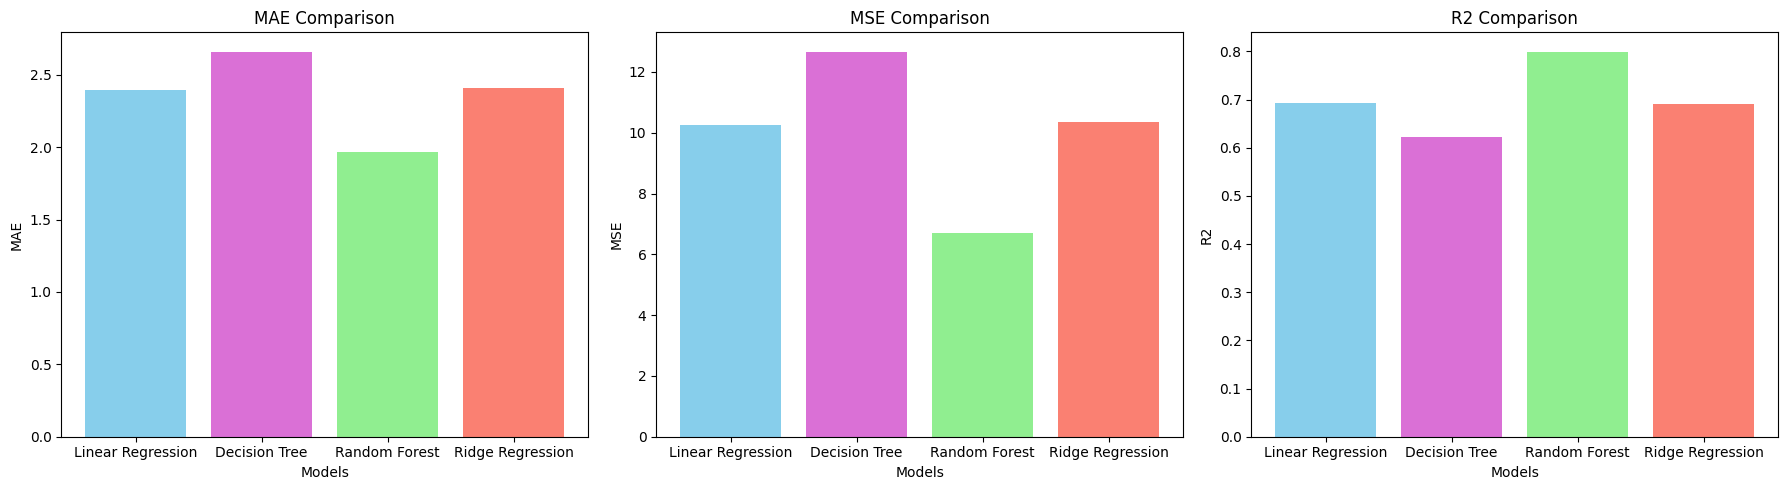

In [25]:
import matplotlib.pyplot as plt

# 성능 지표 시각화
metrics = ['MAE', 'MSE', 'R2']
x = list(results.keys())

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 색상 리스트
colors = ['skyblue', 'orchid', 'lightgreen', 'salmon']

# 각 성능 지표에 대해 막대 그래프 그리기
for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in x]
    axes[i].bar(x, values, color=colors)
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Models')

plt.tight_layout()
plt.show()


# 결과값 해석
## 1. Linear Regression Performance:  
MAE: 2.40: 예측값과 실제값 사이의 평균 절댓값 차이가 약 2.4입니다.  
MSE: 10.25: 예측 오차의 제곱 평균이 약 10.25입니다.  
R²: 0.69: 모델이 실제 값의 변동성의 약 69%를 설명한다는 의미입니다.  
## 2. Ridge Regression Performance:
MAE: 2.41: 예측값과 실제값 사이의 평균 차이는 약 2.41입니다. Linear Regression과 거의 비슷한 수준입니다.  
MSE: 10.35: 예측 오차의 제곱 평균이 약 10.35로, Linear Regression보다 약간 더 큰 값입니다.  
R²: 0.69: 모델이 실제 값의 변동성의 약 69%를 설명합니다. Linear Regression과 비슷한 성능을 보입니다.  
## 3. Decision Tree Performance:
MAE: 2.66: 예측값과 실제값 사이의 차이가 약 2.66으로, Linear Regression과 Ridge Regression에 비해 예측 오차가 조금 더 큽니다.  
MSE: 12.67: 예측 오차의 제곱 평균이 약 12.67로, Linear Regression과 Ridge Regression보다 더 큰 값입니다.  
R²: 0.62: 모델이 실제 값의 변동성의 약 62%를 설명합니다. 다른 모델들에 비해 상대적으로 낮은 성능을 보입니다.  
## 4. Random Forest Performance:
MAE: 1.96: 예측값과 실제값 사이의 차이가 약 1.96으로 가장 작은 값입니다. 예측 오차가 다른 모델들에 비해 가장 적다는 의미입니다.  
MSE: 6.71: 예측 오차의 제곱 평균이 약 6.71로, 가장 작은 값입니다. 이는 모델이 예측을 잘하고 있다는 것을 의미합니다.  
R²: 0.80: 모델이 실제 값의 변동성의 약 80%를 설명합니다. 이는 매우 좋은 성능을 나타내며, Random Forest 모델이 다른 모델들보다 더 높은 예측 성능을 보인다는 것을 의미합니다.  
____
# 모델 성능 비교 요약:
Random Forest 모델이 MAE, MSE, R²모두에서 가장 우수한 성능을 보였습니다.  
예측 오차가 가장 작고, 데이터의 변동성을 80%까지 설명할 수 있습니다.  
Linear Regression과 Ridge Regression은 비슷한 성능을 보였으며, R² 값이 약 0.69로 꽤 좋은 성능을 나타냅니다.  
Decision Tree 모델은 R² 값이 0.62로 상대적으로 낮고 예측 오차도 다른 모델들보다 큽니다.  
따라서, Random Forest가 가장 적합한 모델로 보입니다.